In [2]:
import os
import pandas as pd
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Definir la ruta de la carpeta que contiene las imágenes
#ruta_carpeta = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\Lung X-Ray Image\\Lung X-Ray Image'
ruta_train = "C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\Balls_DB\\train"
ruta_test = "C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\Balls_DB\\test"



Recorremos toda la carpeta y hacemos una matriz con todos los datos de todas las imagenes

In [3]:
# Crear una lista para almacenar los datos de las imágenes
def obtener_imagen_etiqueta(ruta_carpeta):
    directorio = {'Imagen': [], 'Etiqueta': []}
    # Recorrer la carpeta para buscar archivos jpg
    for carpeta_nombre in os.listdir(ruta_carpeta):
        carpeta_ruta = os.path.join(ruta_carpeta, carpeta_nombre)
        if os.path.isdir(carpeta_ruta):
            for archivo_nombre in os.listdir(carpeta_ruta):
                try:
                    archivo_ruta = os.path.join(carpeta_ruta, archivo_nombre)
                    
                    # Cargar la imagen utilizando PIL (Pillow)
                    imagen = face_recognition.load_image_file(archivo_ruta)
                    
                    # Redimensionar la imagen a 150x150
                    imagen_redimensionada = np.array(Image.fromarray(imagen).resize((150, 150)))

                    directorio['Imagen'].append(imagen_redimensionada)
                    directorio['Etiqueta'].append(carpeta_nombre)
                    
                except Exception as e:
                    print("Error en archivo:"+str(archivo_nombre)+":"+str(e))
    print("Proceso terminado")
    return directorio

test_data = obtener_imagen_etiqueta(ruta_test)
train_data = obtener_imagen_etiqueta(ruta_train)

Proceso terminado
Proceso terminado


Transformamos los datos a un pandas

In [4]:
columnas = ['Imagen','Etiqueta']
df_train = pd.DataFrame(test_data, columns=columnas)
df_test = pd.DataFrame(train_data, columns=columnas)


In [5]:
df_train.head()

,Imagen,Etiqueta
0,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",american_football
1,"[[[143, 95, 106], [86, 52, 56], [19, 9, 5], [3...",american_football
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",american_football
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",american_football
4,"[[[252, 252, 252], [255, 255, 255], [254, 254,...",american_football


In [6]:
df_test.head()

,Imagen,Etiqueta
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",american_football
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",american_football
2,"[[[44, 44, 44], [44, 44, 44], [46, 46, 46], [4...",american_football
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",american_football
4,"[[[160, 173, 181], [157, 170, 178], [163, 176,...",american_football


Conversion a JSON. Es muy pesado, por lo que pasamos de ello.

In [22]:
#df_imagenes_recortadas.to_json('test.csv')

In [23]:
#df_jason = pd.read_json('test.csv')
#df_jason.head()

Pickle es una buena opción. Este se usa para serializar objetos en Python. Lamentablemente su uso está únicamente destinado a Python

In [24]:
#df_imagenes_recortadas.to_pickle('test.pkl')

In [25]:
#df_pickle = pd.read_pickle('test.pkl')
#df_pickle.head()

HDF5 es una gran opción. Se usa para el manejo de datos y pueden utilizarlo otros lenguajes o programas como MATLAB y Java. Está destinado para manejo de grandes datos.

Instalar tables para usar hdf5

In [13]:
#pip install tables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 16.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.7/374.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.1/385.1 kB 24.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
df_train.to_hdf('sportBalls_train.h5', key='dataframe', mode='w')
df_test.to_hdf('sportBalls_test.h5', key='dataframe', mode='w')


C:\Users\Waldosir\AppData\Local\Temp\ipykernel_6888\2389108593.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Etiqueta'], dtype='object')]

  df_train.to_hdf('sportBalls_train.h5', key='dataframe', mode='w')
C:\Users\Waldosir\AppData\Local\Temp\ipykernel_6888\2389108593.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Etiqueta'], dtype='object')]

  df_test.to_hdf('sportBalls_test.h5', key='dataframe', mode='w')


Leer el archivo creado

In [8]:
df_HDF = pd.read_hdf('sportBalls_test.h5')


In [9]:
df_HDF.head()

,Imagen,Etiqueta
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",american_football
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",american_football
2,"[[[44, 44, 44], [44, 44, 44], [46, 46, 46], [4...",american_football
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",american_football
4,"[[[160, 173, 181], [157, 170, 178], [163, 176,...",american_football


Nuevamente visualizamos los datos para ver que si esten correctamente

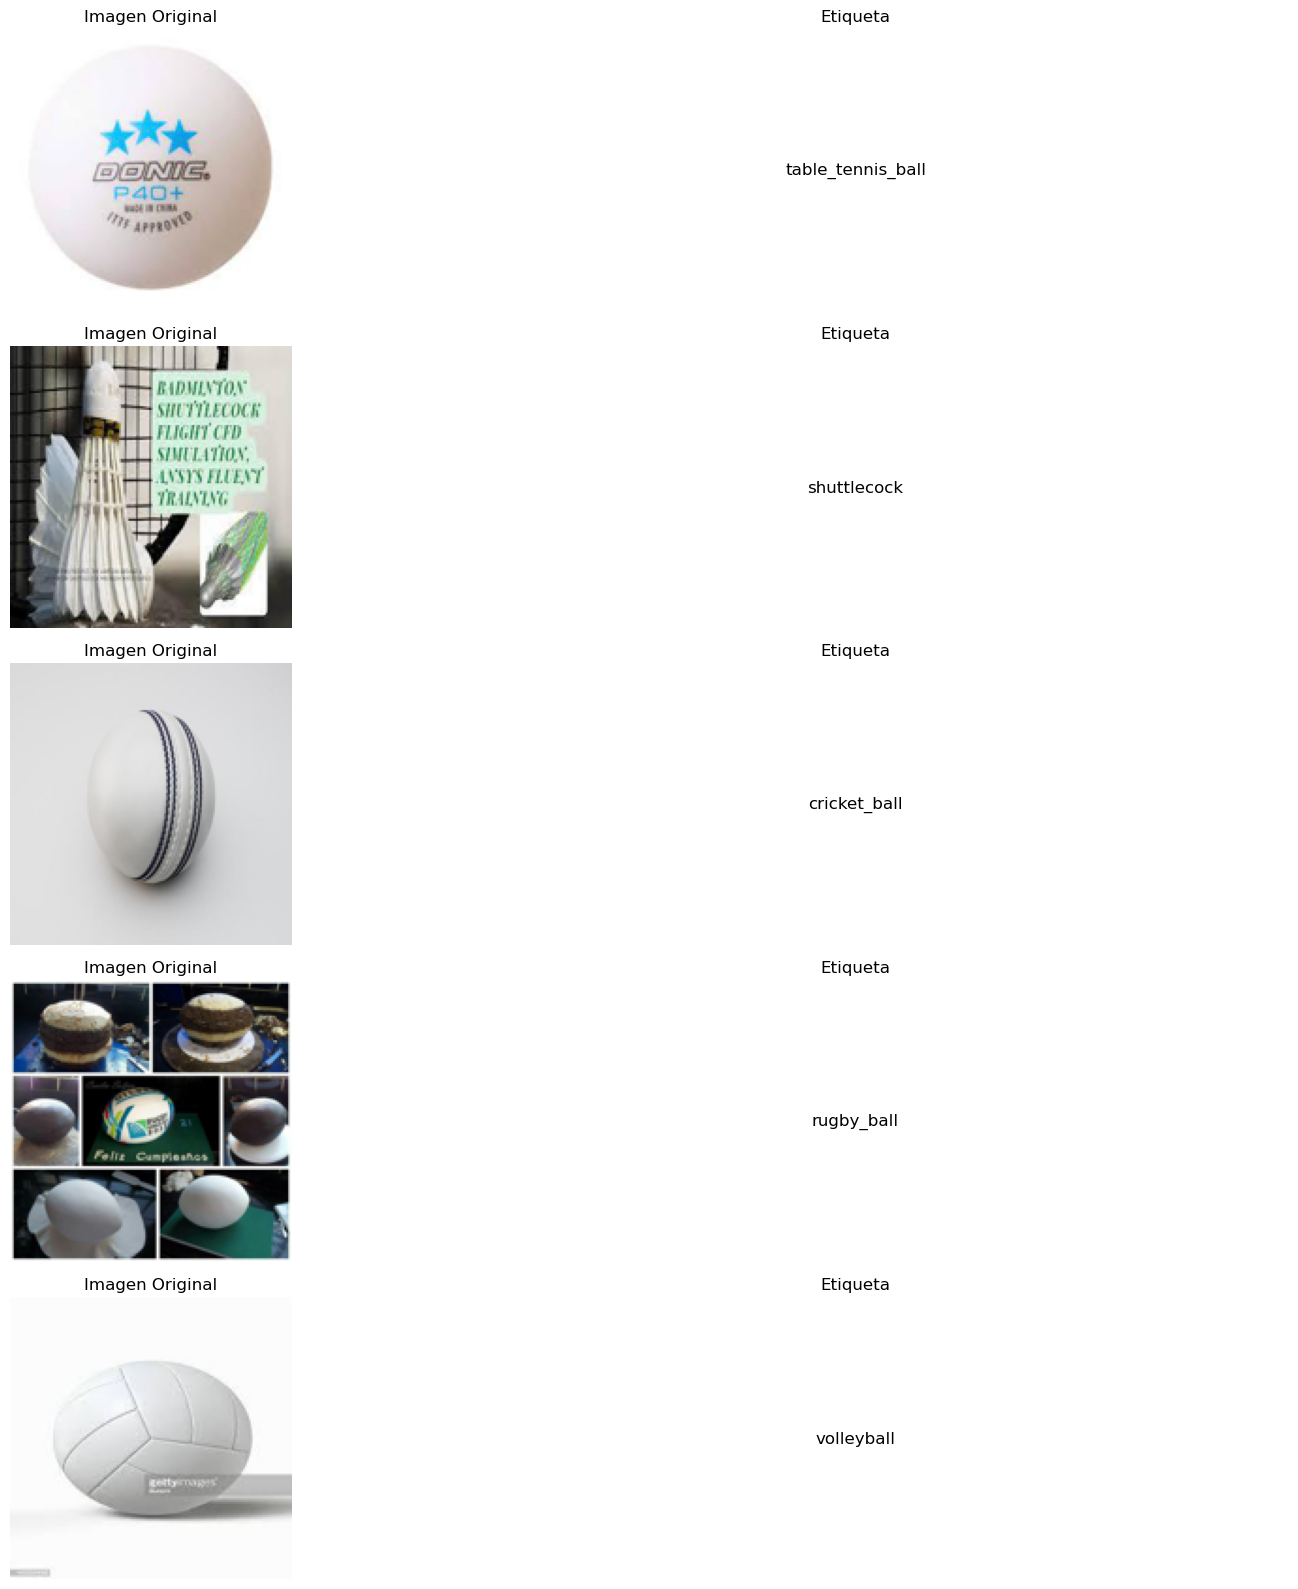

In [10]:
df_ejemploHDF = df_HDF.sample(n=5)

# Visualizar las imágenes seleccionadas con los rostros detectados y los landmarks faciales
fig, axes = plt.subplots(nrows=len(df_ejemploHDF), ncols=2, figsize=(16, 16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    # Subgráfico para la imagen original
    ax0 = axes[i, 0]
    ax0.imshow(row['Imagen'])
    ax0.set_title("Imagen Original")
    ax0.axis('off')
    

    
    # Subgráfico para la emoción (si está disponible)
    ax3 = axes[i, 1]
    # Aquí puedes agregar código para mostrar la emoción en lugar de un gráfico vacío
    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax3.set_title("Etiqueta")
    ax3.axis('off')

plt.tight_layout()
plt.show()